In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install sklearn

In [3]:
import sklearn

In [5]:
from sklearn import datasets

In [6]:
data = datasets.load_diabetes()

In [7]:
import sklearn

In [8]:
import pandas as pd
import numpy as np

from sklearn import datasets
data = datasets.load_diabetes()

In [9]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [10]:
data['data'].shape

(442, 10)

In [26]:
data['target'].shape

(442,)

In [27]:
len(data['feature_names'])

10

In [12]:
df=pd.DataFrame(data['data'], index=data['target'], columns= data['feature_names'])

target is diabetes, age, sex, BMI are variables

 442명의 사람들을 상대로 10가지의 특성들을 나열한것

In [13]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
132.0,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


### Scatter Plots
Check Correlations

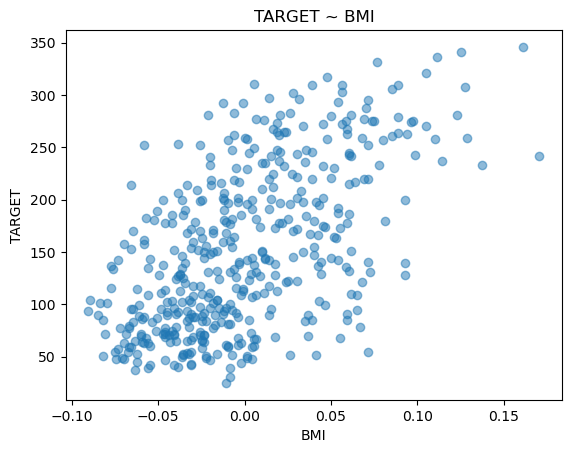

In [14]:
X = df.bmi.values
Y = df.index.values

import matplotlib.pyplot as plt
plt.scatter(X, Y, alpha=0.5)
plt.title('TARGET ~ BMI')
plt.xlabel('BMI')
plt.ylabel('TARGET')
plt.show() 


### Covariance and Correlation Coefficient

두 변수 간의 관계를 수치로 표현하기 위해 공분산 및 상관계수를 이용

corrcoef() 함수 활용

In [15]:
import numpy as np

In [16]:
np.corrcoef(X,Y)

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

In [17]:
np.corrcoef(X,Y)[0,1] 

0.5864501344746885

BMI(체질량지수)와 당뇨병수치(Target)는 뚜렷한 양적 선형관계를 이루고 있다고 볼 수 있음

상관계수 값 자체가 유의미한가를 검정할 수 있다

그 중 하나로 p-value를 많이 이용하는데,

scipy 패키지의 stats.pearsonr()을 이용하면 상관계수와 p-value를 동시에 얻을 수 있습니다.

In [19]:
import scipy.stats as stats
stats.pearsonr(X,Y)

PearsonRResult(statistic=0.5864501344746887, pvalue=3.4660064451654114e-42)

이용해 귀무가설 "상관관계가 없다"에 대한 검정 결과 p-value가 3.46e-42라는 0에 아주 매우 가까운 값이 나왔으므로 귀무가설을 기각할 수 있음

In [21]:
for item in ['age','sex','bmi','bp']:
    print(item)
    X=df[item].values
    print(f'Covariance: {np.cov(X,Y)[0,1]}')
    print(f'Correlation: {stats.pearsonr(X,Y)[0]}')
    print(f'P-value: {stats.pearsonr(X,Y)[1]}')
    print("\n")

age
Covariance: 0.6897575386129393
Correlation: 0.18788875071891983
P-value: 7.055686149112959e-05


sex
Covariance: 0.15808470675377498
Correlation: 0.04306199845160542
P-value: 0.3664292946517888


bmi
Covariance: 2.152914422639542
Correlation: 0.5864501344746887
P-value: 3.4660064451654114e-42


bp
Covariance: 1.620721676861769
Correlation: 0.44148175856257116
P-value: 1.6493720527419015e-22




당뇨병수치와 가장 상관관계가 높은 것은 bmi이고 age나 sex는 큰 관련이 없음

In [22]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In [23]:
import seaborn as sns

In [24]:
#!pip install seaborn

<Axes: >

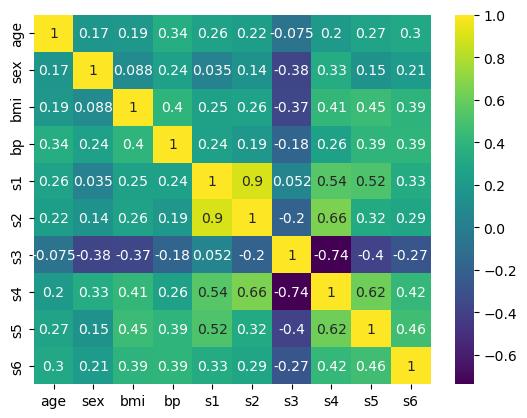

In [26]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')


결측 값(missing value)도 그래프로 확인하는 할 수 있다.



<Axes: >

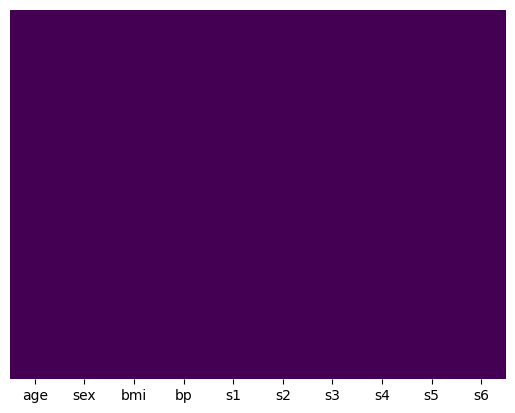

In [29]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


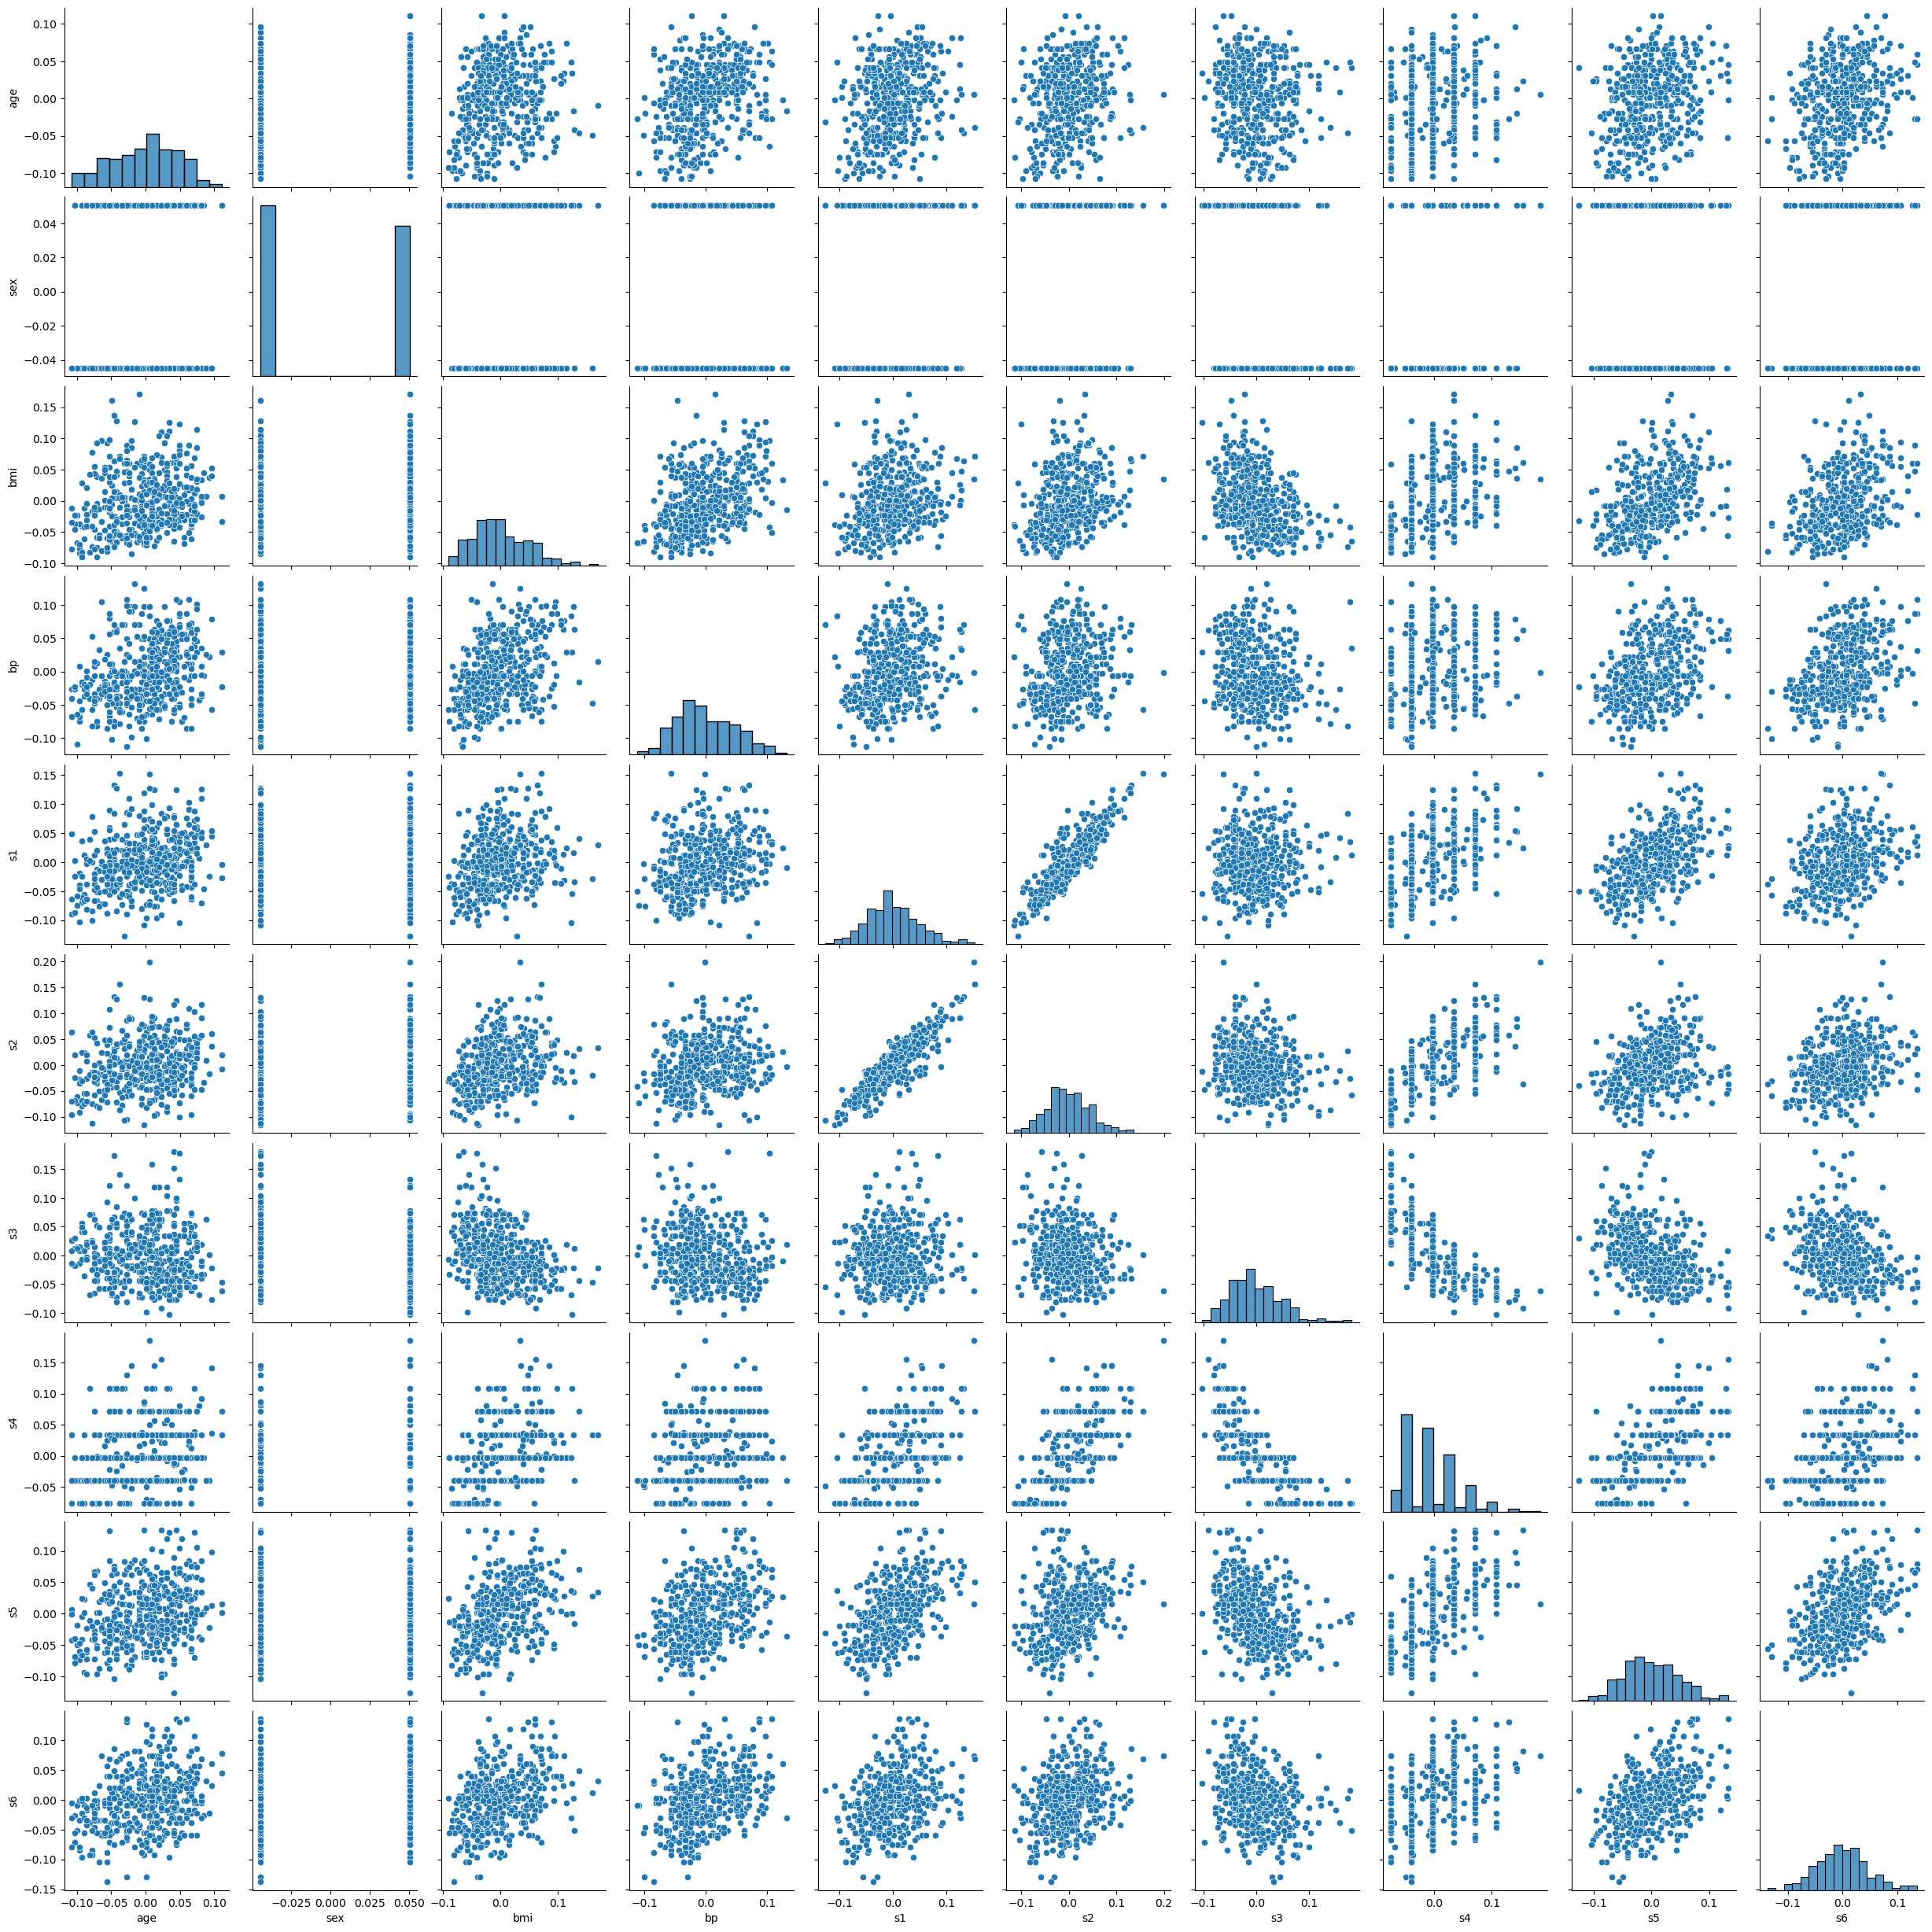

In [30]:
sns.pairplot(df)